In [1]:
import numpy as np
from plots import *
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [10]:
# Load all the separate dataframes and concatenate
dfs = []
for name in ["Pre-2014 Data", "Curated Data", "Extra Owl", "Lots of Data", "UWO Data", "York Data 1", "York Data 2", "York Data 3"]:
    print(f"Loading {name}")
    df0 = pd.read_parquet(f"{name}.parquet")
    dfs.append(df0)
    
print("Combining into one Dataframe!")
df = pd.concat(dfs)

Loading Pre-2014 Data
Loading Curated Data
Loading Extra Owl
Loading Lots of Data
Loading UWO Data
Loading York Data 1
Loading York Data 2
Loading York Data 3
Combining into one Dataframe!


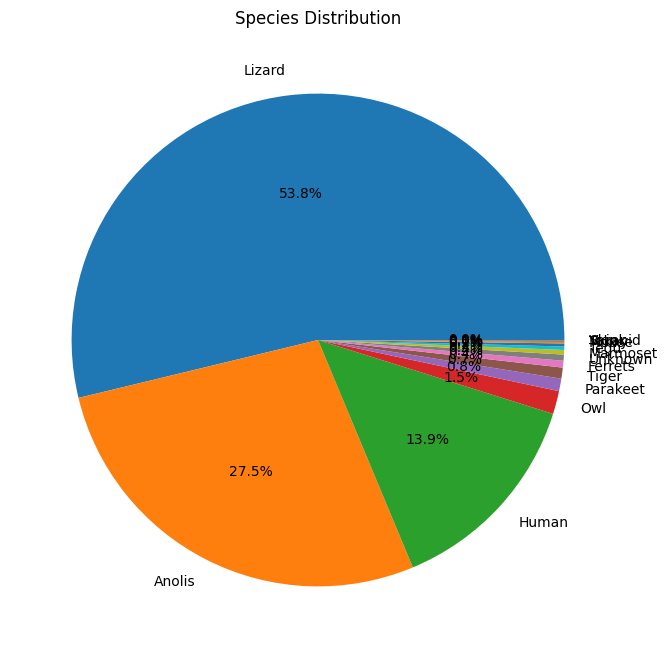

In [11]:
# Get number of each species and plot in a pie chart
species_counts = df['species'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%')
plt.title('Species Distribution')
plt.show()

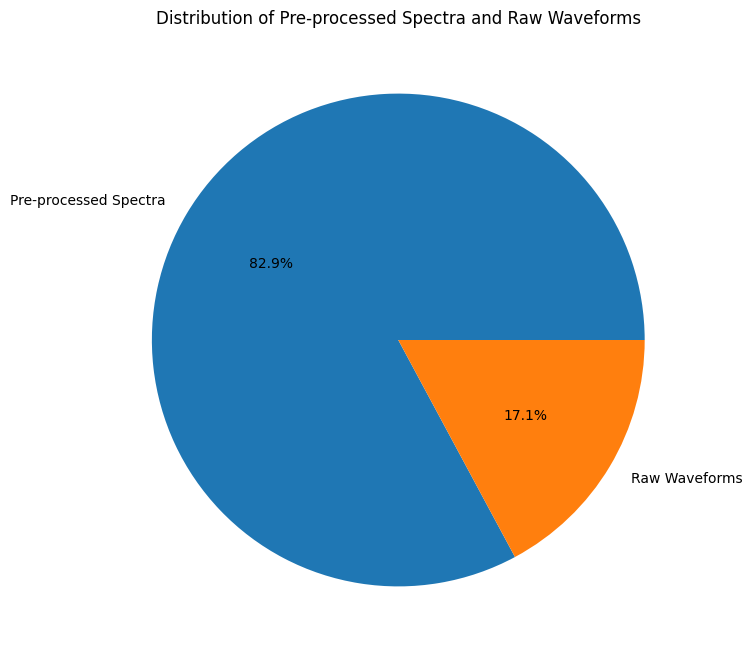

In [12]:
# Get how many are pre-processed
num_preprocessed = (df['sr'] == 0).sum()
num_wf = len(df) - num_preprocessed

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie([num_preprocessed, num_wf], labels=['Pre-processed Spectra', 'Raw Waveforms'], autopct='%1.1f%%')
plt.title('Distribution of Pre-processed Spectra and Raw Waveforms')
plt.show()

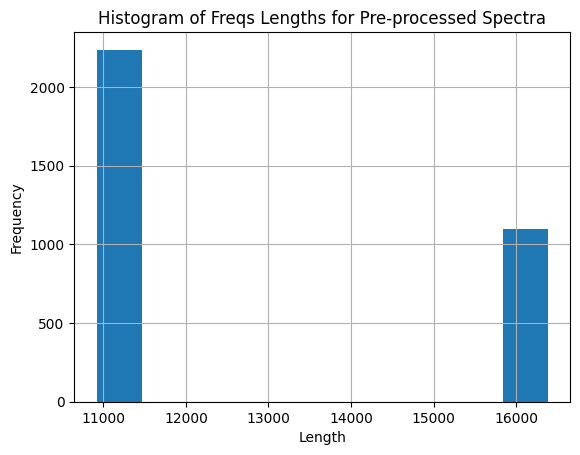

In [13]:
# Out of the preprocessed ones, get a histogram of the number of frequency bins
freq_lengths = df[df['sr'] == 0]['freqs'].apply(len)
freq_lengths.hist()
plt.title('Histogram of Freqs Lengths for Pre-processed Spectra')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

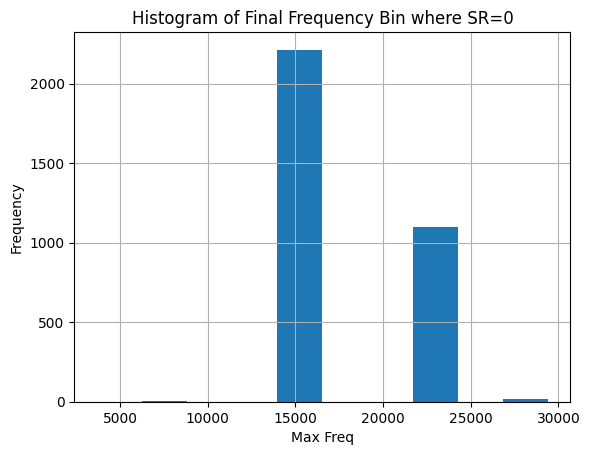

In [14]:
# Out of the preprocessed ones, get a histogram of the maximum frequency bin value
max_freqs = df[df['sr'] == 0]['freqs'].apply(lambda x: x[-1])
max_freqs.hist()
plt.title('Histogram of Final Frequency Bin where SR=0')
plt.xlabel('Max Freq')
plt.ylabel('Frequency')
plt.show()

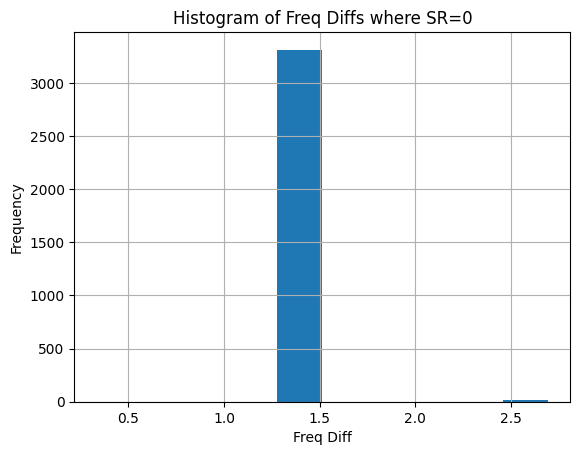

In [16]:
# Out of the preprocessed ones, get a histogram of the spacing between frequency bins
freq_diffs = df[df['sr'] == 0]['freqs'].apply(lambda x: x[100] - x[99])
freq_diffs.hist()
plt.title('Histogram of Freq Diffs where SR=0')
plt.xlabel('Freq Diff')
plt.ylabel('Frequency')
plt.show()